**KNN Clasification**

Using penguin dataset form sns.

**Importamos las librerias necesarias**

In [115]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Cargamos el  dataset**

Usaremos el dataset *penguin* que se encuentra en la librerias seaborn.

In [116]:
SNSpenguins = sns.load_dataset("penguins")
SNSpenguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Hacemos el dataset en forma de dataframe.

In [117]:
#Convert the penguins dataset to a pandas dataframe
penguins = pd.DataFrame(SNSpenguins)

**Analizamos el dataset**

In [118]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Eliminamos los datos nulos para poder trabajar con los restantes, de forma en que solo se cuenten con datos completos.

In [119]:
# Eliminamos las filas con valores nulos
penguins = penguins.dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Mostramos las variables independientes y la variable dependiente.

In [120]:
#Datos cuantitativos
#Variables independientes(input)
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<AxesSubplot:xlabel='species'>

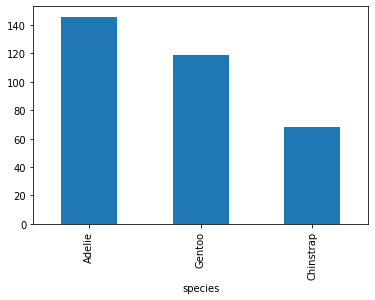

In [121]:
#Datos cualitativos
#Variables dependientes(output)
penguins['species'].unique()
penguins['species'].value_counts().plot(kind='bar')

Hacemos las clases como valores numericos.

In [122]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [123]:
#Las clases las convertimos a números
penguins['species'] = penguins['species'].map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
#Las islas las convertimos a números
penguins['island'] = penguins['island'].map({'Biscoe':0, 'Dream':1, 'Torgersen':2})
#Los sexos los convertimos a números
penguins['sex'] = penguins['sex'].map({'Female':0, 'Male':1})

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


Analizamos la correlacion de las variables.

<AxesSubplot:>

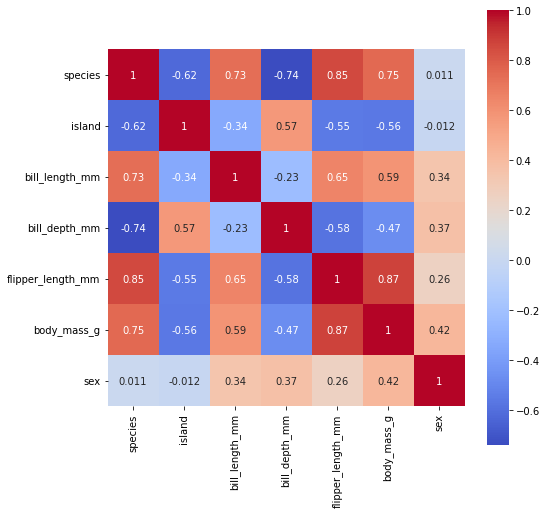

In [126]:
#Correlación
plt.figure(figsize=(8, 8))
sns.heatmap(penguins.corr(), annot=True, cmap='coolwarm', square=True)

**Asignamos nuestros valores que usaremos para cada variable**

Lo que buscamos es predecir el tipo de penguin, para ello haremos uso de las siguientes variables:
